In [75]:
# Import library yang dibutuhkan
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns

# warning
import warnings
warnings.filterwarnings("ignore")

In [76]:
# Membuat koneksi ke database chinook.db
con = sqlite3.connect("Downloads\olist.db") 

In [77]:
# lihat list table
invoice = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", con)
invoice

,name
0,olist_order_customer_dataset
1,olist_order_dataset
2,olist_order_reviews_dataset
3,olist_order_payments_dataset
4,olist_order_items_dataset
5,olist_products_dataset
6,olist_sellers_dataset
7,olist_geolocation_dataset
8,product_category_name_translation


# *Objekif*

- 1. Perusahaan ingin mengetahui 10 produk yang paling banyak terjual
- 2. Perusahaan ingin mengetahui 10 produk yang menghasilkan total sales paling tinggi
- 3. Perusahaan ingin mengetahui apakah produk yang paling banyak dipesan menghasilkan total sales yang besar pula
- 4. Perusahaan ingin mengetahui pertumbuhan order dari 10 produk yang paling laris
- 5. Perusahaan ingin mengetahui tren total penjualan bulanan dari 10 produk yang paling laris

In [78]:
# # Membuat query
query = """
SELECT * FROM olist_order_dataset
"""

# Mengakses table order
order = pd.read_sql(query, con)
order

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...,...
99436,99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [79]:
# # Membuat query
query = """
SELECT * FROM olist_order_items_dataset;
"""
# Mengakses table order items
order_items = pd.read_sql(query, con)
order_items

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...,...
112645,112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [80]:
# # Membuat query
query = """
SELECT * FROM olist_products_dataset
"""

# Mengakses table products
products = pd.read_sql(query, con)
products

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...,...
32946,32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [81]:
# # Membuat query
query = """
SELECT * FROM product_category_name_translation ;
"""
# Mengakses table product category
product_category = pd.read_sql(query, con)
product_category

,index,product_category_name,product_category_name_english
0,0,beleza_saude,health_beauty
1,1,informatica_acessorios,computers_accessories
2,2,automotivo,auto
3,3,cama_mesa_banho,bed_bath_table
4,4,moveis_decoracao,furniture_decor
...,...,...,...
66,66,flores,flowers
67,67,artes_e_artesanato,arts_and_craftmanship
68,68,fraldas_higiene,diapers_and_hygiene
69,69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


# *Data Cleaning*

In [82]:
products.head()

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [83]:
# Memilih kolom yang dibutuhkan untuk proses analisis
products = products[['product_id','product_category_name']]
products.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


In [84]:
# Memilih kolom yang dibutuhkan untuk proses analisis
product_category.drop(['index'], axis = 1, inplace = True)

In [85]:
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [86]:
#  Mengganti product name bahasa spanyol menjadi bahasa inggris dengan cara left join dgn table category products
#  Namun terdapat value pada table products yang tdk ada di product_category sehingga value tersebut harus di-replace manual
left_join_product = products.merge(product_category, how='left', on='product_category_name', indicator=True)
left_outer_join_product = left_join_product[left_join_product['_merge'] == 'left_only']

# Terdapat dua products yg belum ada di table product category
left_outer_join_product['product_category_name'].unique()

array([None, 'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'],
      dtype=object)

In [87]:
# Terdapat dua products yg belum ada di table product category
kondisi_satu = left_outer_join_product['product_category_name'] == 'pc_gamer'
kondisi_dua = left_outer_join_product['product_category_name'] == 'portateis_cozinha_e_preparadores_de_alimentos'

left_outer_join_product[kondisi_satu | kondisi_dua]

,product_id,product_category_name,product_category_name_english,_merge
1628,0105b5323d24fc655f73052694dbbb3a,pc_gamer,NaN,left_only
5821,6fd83eb3e0799b775e4f946bd66657c0,portateis_cozinha_e_preparadores_de_alimentos,NaN,left_only
7325,5d923ead886c44b86845f69e50520c3e,portateis_cozinha_e_preparadores_de_alimentos,NaN,left_only
7478,6727051471a0fc4a0e7737b57bff2549,pc_gamer,NaN,left_only
8819,bed164d9d628cf0593003389c535c6e0,portateis_cozinha_e_preparadores_de_alimentos,NaN,left_only
11039,1220978a08a6b29a202bc015b18250e9,portateis_cozinha_e_preparadores_de_alimentos,NaN,left_only
14266,ae62bb0f95af63d64eae5f93dddea8d3,portateis_cozinha_e_preparadores_de_alimentos,NaN,left_only
16182,1954739d84629e7323a4295812a3e0ec,portateis_cozinha_e_preparadores_de_alimentos,NaN,left_only
16930,dbe520fb381ad695a7e1f2807d20c765,pc_gamer,NaN,left_only
17800,c7a3f1a7f9eef146cc499368b578b884,portateis_cozinha_e_preparadores_de_alimentos,NaN,left_only


In [88]:
# Menambahkan daftar products yang belum ada ke dalam table products_category
product_category.loc[len(product_category.index)] = ['pc_gamer','pc_gamer'] 
product_category.loc[len(product_category.index)] = ['portateis_cozinha_e_preparadores_de_alimentos','portable kitchen food preparation']
product_category.tail()

,product_category_name,product_category_name_english
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
70,seguros_e_servicos,security_and_services
71,pc_gamer,pc_gamer
72,portateis_cozinha_e_preparadores_de_alimentos,portable kitchen food preparation


In [89]:
# Setelah table product category lengkap maka melakukan join table products dengan product_category
new_products = products.merge(product_category, how='left', on='product_category_name')
new_products

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares
...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,computers_accessories


In [90]:
# Drop kolom product name yang memiliki bahasa portugal
new_products.drop(['product_category_name'], axis = 1, inplace = True)

In [91]:
# Rename column menjadi product name
new_products.rename(columns={'product_category_name_english': 'product_name'},inplace=True)
new_products.head()

,product_id,product_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,housewares


In [92]:
# Mengecek missing value pada table new products
new_products.isnull().sum()

product_id        0
product_name    610
dtype: int64

In [93]:
# Mengecek persentase missing value pada table new products
new_products.isnull().sum()/len(products)*100

product_id      0.000000
product_name    1.851234
dtype: float64

In [94]:
# Handling missing value pada table new products
# Isi missing value dengan 'unknown'
new_products['product_name'] = new_products['product_name'].fillna('unknown')

# mengecek missing value lagi
new_products.isnull().sum()

product_id      0
product_name    0
dtype: int64

In [95]:
order.head()

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [96]:
# Select kolom yang ingin dianalsis
order = order[['order_id', 'order_status', 'order_purchase_timestamp']]
order.head()

,order_id,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39


In [97]:
# Mengecek missing value pada table order
order.isnull().sum()

order_id                    0
order_status                0
order_purchase_timestamp    0
dtype: int64

In [98]:
order.dtypes

order_id                    object
order_status                object
order_purchase_timestamp    object
dtype: object

In [99]:
# mengubah tipe data kolom order_purchase_timestamp menjadi date
order['order_purchase_timestamp'] = pd.to_datetime(order['order_purchase_timestamp'], yearfirst = True)

In [100]:
# mengecek tipe data semua kolom pada table order
order.dtypes

order_id                            object
order_status                        object
order_purchase_timestamp    datetime64[ns]
dtype: object

In [101]:
order_items.head()

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [102]:
# Select kolom yang ingin dianalisis
order_items.drop(['index','seller_id','shipping_limit_date','freight_value','order_item_id'], axis = 1, inplace = True)

In [103]:
order_items.head()

,order_id,product_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90


In [104]:
# Mengecek missing value pada table order item
order_items.isnull().sum()

order_id      0
product_id    0
price         0
dtype: int64

# Handling Duplicated

In [105]:
new_products.duplicated().any()

False

In [106]:
order.duplicated().any()

False

In [107]:
order_items.duplicated().any()

True

# Handling Inconsistent Format

In [108]:
new_products['product_name'].unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', 'unknown', 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical',
     

In [109]:
new_products['product_name'].value_counts()

bed_bath_table               3029
sports_leisure               2867
furniture_decor              2657
health_beauty                2444
housewares                   2335
                             ... 
fashion_childrens_clothes       5
home_comfort_2                  5
pc_gamer                        3
security_and_services           2
cds_dvds_musicals               1
Name: product_name, Length: 74, dtype: int64

In [110]:
order['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

# *EDA*

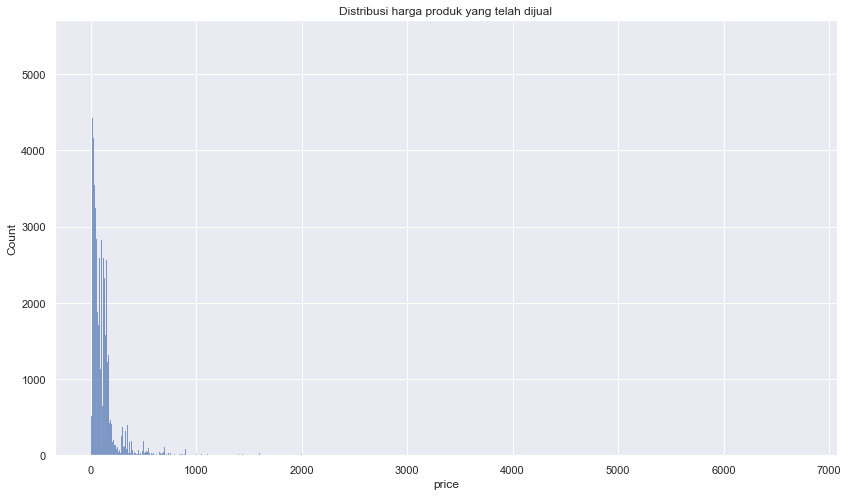

In [111]:
# visualisasi distribusi data price
sns.set(rc={'figure.figsize':(14,8)})
sns.histplot(data = order_items, x = 'price').set_title("Distribusi harga produk yang telah dijual")
plt.show()

Data price memiliki bentuk skewed distribution yang artinya memiliki outlier. Maka visualisasi akan lebih baik jika menggunakan logaritma dari price.

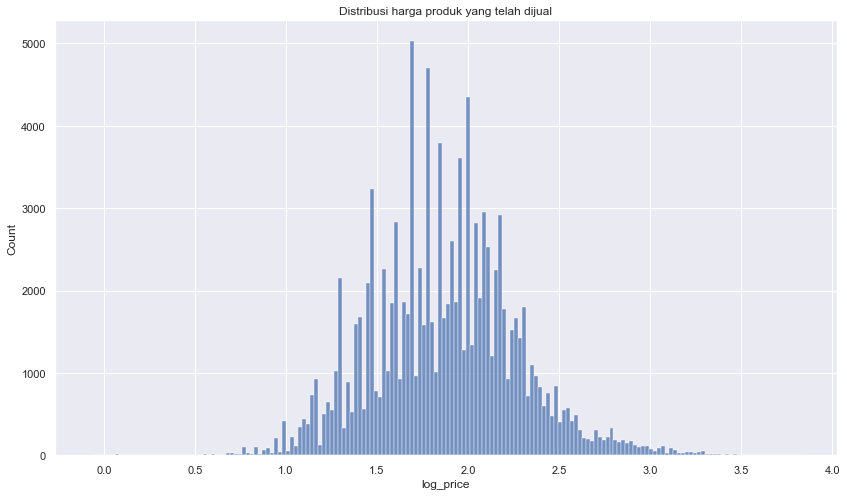

In [133]:
# visualisasi distribusi data price
sns.set(rc={'figure.figsize':(14,8)})

# TRANSFORMASI HARGA JADI LOG PRICE
order_items["log_price"] = np.log10(order_items["price"])
sns.histplot(data = order_items, x = 'log_price').set_title("Distribusi harga produk yang telah dijual")
plt.show()

Data price memiliki distribusi normal setelah dilakukan penyesuaian skala menggunakan logaritma.

Outlier akan tetap dibiarkan karena berpengaruh terhadap objektif analisis yang akan dilakukan.

# Data Manipulation
Daftar table yg sudah terbentuk
- new_products
- order
- order_items

## Menggabungkan 3 tabel yang sudah terbentuk

In [113]:
# Left join table new_product dengan table order_items
most_products = order_items.merge(new_products, how = 'left', on = 'product_id')
most_products 

,order_id,product_id,price,log_price,product_name
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,1.770115,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,2.380030,pet_shop
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,2.298853,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,1.113609,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,2.300813,garden_tools
...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,299.99,2.477107,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,350.00,2.544068,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,99.90,1.999565,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,55.99,1.748110,computers_accessories


In [114]:
most_products = most_products.merge(order, how = 'left', on = 'order_id')
most_products 

,order_id,product_id,price,log_price,product_name,order_status,order_purchase_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,1.770115,cool_stuff,delivered,2017-09-13 08:59:02
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,2.380030,pet_shop,delivered,2017-04-26 10:53:06
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,2.298853,furniture_decor,delivered,2018-01-14 14:33:31
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,1.113609,perfumery,delivered,2018-08-08 10:00:35
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,2.300813,garden_tools,delivered,2017-02-04 13:57:51
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,299.99,2.477107,housewares,delivered,2018-04-23 13:57:06
112646,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,350.00,2.544068,computers_accessories,delivered,2018-07-14 10:26:46
112647,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,99.90,1.999565,sports_leisure,delivered,2017-10-23 17:07:56
112648,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,55.99,1.748110,computers_accessories,delivered,2017-08-14 23:02:59


In [115]:
most_products.isnull().sum()

order_id                    0
product_id                  0
price                       0
log_price                   0
product_name                0
order_status                0
order_purchase_timestamp    0
dtype: int64

In [116]:
most_products.dtypes

order_id                            object
product_id                          object
price                              float64
log_price                          float64
product_name                        object
order_status                        object
order_purchase_timestamp    datetime64[ns]
dtype: object

In [117]:
most_products['day'] = most_products['order_purchase_timestamp'].dt.day
most_products['month'] = most_products['order_purchase_timestamp'].dt.month
most_products['year'] = most_products['order_purchase_timestamp'].dt.year
most_products['hour'] = most_products['order_purchase_timestamp'].dt.hour

In [118]:
print(min(most_products['order_purchase_timestamp']))
print(max(most_products['order_purchase_timestamp']))

2016-09-04 21:15:19
2018-09-03 09:06:57


## Perusahaan ingin mengetahui 10 produk yang paling banyak terjual

In [119]:
most_products.head()

,order_id,product_id,price,log_price,product_name,order_status,order_purchase_timestamp,day,month,year,hour
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,1.770115,cool_stuff,delivered,2017-09-13 08:59:02,13,9,2017,8
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,2.380030,pet_shop,delivered,2017-04-26 10:53:06,26,4,2017,10
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,2.298853,furniture_decor,delivered,2018-01-14 14:33:31,14,1,2018,14
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,1.113609,perfumery,delivered,2018-08-08 10:00:35,8,8,2018,10
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,2.300813,garden_tools,delivered,2017-02-04 13:57:51,4,2,2017,13


In [120]:
top_products = most_products[['product_name','order_id']].groupby(['product_name']).count().sort_values(by = ['order_id'], ascending = False).head(10)
top_products

,order_id
product_name,
bed_bath_table,11115
health_beauty,9670
sports_leisure,8641
furniture_decor,8334
computers_accessories,7827
housewares,6964
watches_gifts,5991
telephony,4545
garden_tools,4347


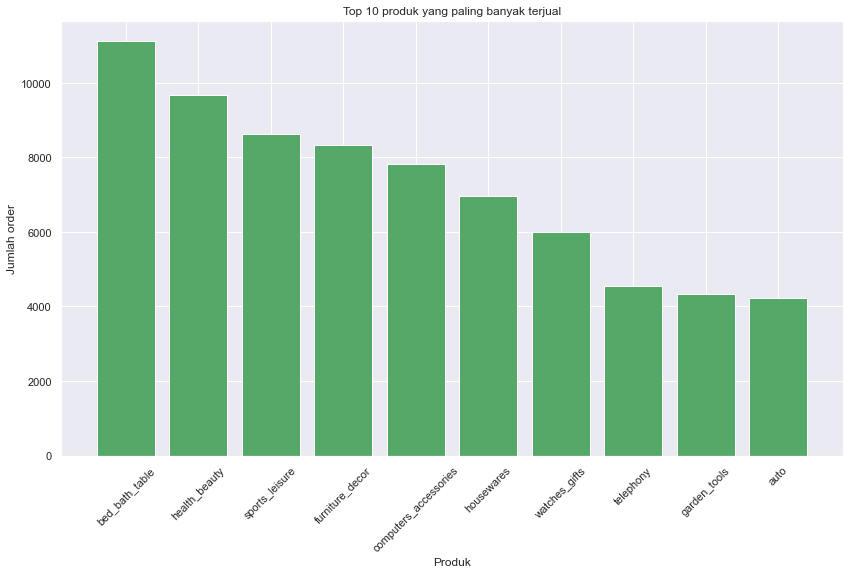

In [121]:
a = top_products.index
b = top_products.value_counts()[::-1].index

plt.bar(a,b, color='g')
plt.xticks(rotation=45)
plt.xlabel("Produk")
plt.ylabel("Jumlah order")
plt.title("Top 10 produk yang paling banyak terjual")
plt.show()


Didapatkan hasil bahwa produk yang paling banyak di-order oleh customer adalah bed_bath_table dengan kuantitas order sebanyak 11115. Lalu, diikuti oleh product category health_beauty sebanyak 9670 dan produk sports_leisure	sebanyak 8641. Sementara itu, product category yang menduduki posisi ke-10 adalah auto sebesar 4235 order.


## Perusahaan ingin mengetahui 10 produk yang menghasilkan total sales paling tinggi

In [122]:
total_sales = most_products[['product_name','price']].groupby(['product_name']).sum().sort_values(by = ['price'], ascending = False).head(10)
total_sales

,price
product_name,
health_beauty,1258681.34
watches_gifts,1205005.68
bed_bath_table,1036988.68
sports_leisure,988048.97
computers_accessories,911954.32
furniture_decor,729762.49
cool_stuff,635290.85
housewares,632248.66
auto,592720.11


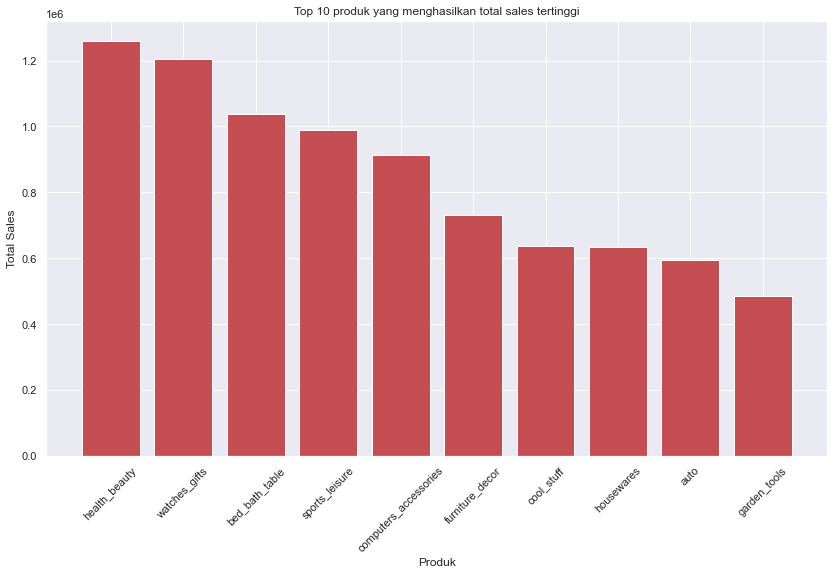

In [123]:
a = total_sales.index
b = total_sales.value_counts()[::-1].index

plt.bar(a,b, color = 'r')
plt.xticks(rotation=45)
plt.xlabel("Produk")
plt.ylabel("Total Sales")
plt.title("Top 10 produk yang menghasilkan total sales tertinggi")
plt.show()

Saat memasuki bulan ke-8 terjadi puncak lonjakan penurunan order, pemesanan produk mengalami penurunan sampai bulan Desember. Meskipun sempat terjadi kenaikan order pada bulan ke-11 tetapi pemesanan produk perlahan-lahan kembali menurun sampai bulan ke-12.

## Perusahaan ingin mengetahui apakah produk yang paling banyak dipesan menghasilkan total sales yang besar pula

In [124]:
# mengatur palette
cm = sns.light_palette("green", as_cmap=True)

In [142]:
most_products.pivot_table(values=['price', 'order_id'], index=['product_name'], aggfunc={'price':np.sum, 'order_id':len}).sort_values(by='order_id', ascending=False).style.background_gradient(cmap=cm).set_precision(2)

,order_id,price
product_name,,
bed_bath_table,11115,1036988.68
health_beauty,9670,1258681.34
sports_leisure,8641,988048.97
furniture_decor,8334,729762.49
computers_accessories,7827,911954.32
housewares,6964,632248.66
watches_gifts,5991,1205005.68
telephony,4545,323667.53
garden_tools,4347,485256.46


Diperoleh hasil bahwa produk yang paling banyak dijual akan memiliki kecenderungan untuk menghasilkan total sales yang tinggi pula. Oleh karena itu, perusahaan harus tetap mempertahankan kualitas produk tersebut dan membuat strategi untuk terus menarik atensi customer supaya tetap loyal berbelanja produk tersebut. Misalnya, dengan mengutamakan memasang layanan iklan untuk produk paling laris, memberikan diskon spesial, atau pun menawarkan potongan harga ongkir.

## Perusahaan ingin mengetahui pertumbuhan pemesanan produk  dari 10 produk yang paling laris

In [126]:
top_products

,order_id
product_name,
bed_bath_table,11115
health_beauty,9670
sports_leisure,8641
furniture_decor,8334
computers_accessories,7827
housewares,6964
watches_gifts,5991
telephony,4545
garden_tools,4347


In [127]:
# memilih 10 product yang paling laris
grow_products = most_products.query('product_name in @top_products.index')
grow_products

,order_id,product_id,price,log_price,product_name,order_status,order_purchase_timestamp,day,month,year,hour
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,2.298853,furniture_decor,delivered,2018-01-14 14:33:31,14,1,2018,14
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,2.300813,garden_tools,delivered,2017-02-04 13:57:51,4,2,2017,13
5,00048cc3ae777c65dbb7d2a0634bc1ea,ef92defde845ab8450f9d70c526ef70f,21.90,1.340444,housewares,delivered,2017-05-15 21:42:34,15,5,2017,21
6,00054e8431b9d7675808bcb819fb4a32,8d4f2bb7e93e6710a28f34fa83ee7d28,19.90,1.298853,telephony,delivered,2017-12-10 11:53:48,10,12,2017,11
7,000576fe39319847cbb9d288c5617fa6,557d850972a7d6f792fd18ae1400d9b6,810.00,2.908485,garden_tools,delivered,2018-07-04 12:08:27,4,7,2018,12
...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,299.99,2.477107,housewares,delivered,2018-04-23 13:57:06,23,4,2018,13
112646,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,350.00,2.544068,computers_accessories,delivered,2018-07-14 10:26:46,14,7,2018,10
112647,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,99.90,1.999565,sports_leisure,delivered,2017-10-23 17:07:56,23,10,2017,17
112648,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,55.99,1.748110,computers_accessories,delivered,2017-08-14 23:02:59,14,8,2017,23


In [128]:
grow_order = pd.DataFrame(data = grow_products.groupby(['month', 'product_name'])['order_id'].count()).sort_values(by = ['order_id'], ascending = False)
grow_order

order_id
month product_name            
8     health_beauty       1209
7     bed_bath_table      1203
8     bed_bath_table      1170
6     bed_bath_table      1155
      health_beauty       1145
...                        ...
10    housewares           247
9     garden_tools         225
      telephony            178
10    auto                 162
9     auto                 108

[120 rows x 1 columns]

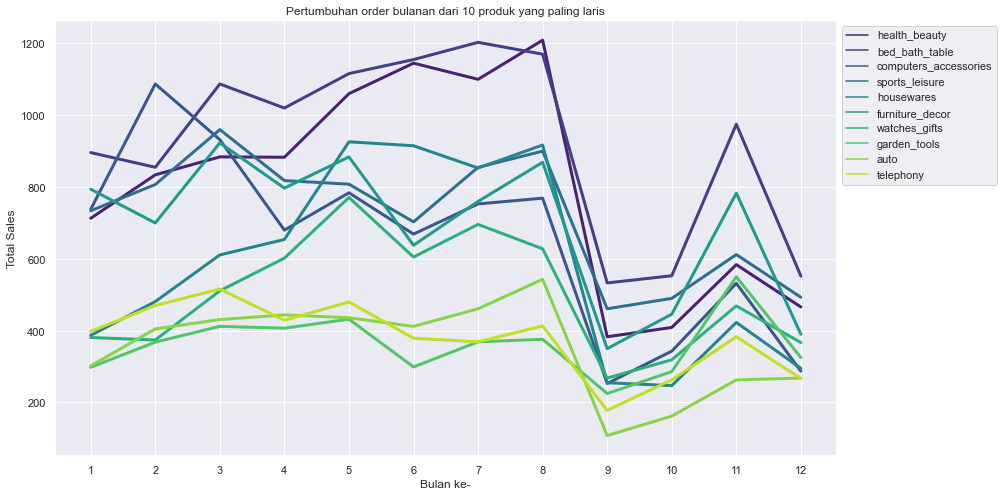

In [129]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=grow_order, x ='month', y = 'order_id',
                  hue='product_name', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Pertumbuhan order bulanan dari 10 produk yang paling laris")
plt.ylabel('Total Sales')
plt.xlabel('Bulan ke-')
plt.show()


Saat memasuki bulan ke-8 terjadi puncak lonjakan penurunan order, pemesanan produk mengalami penurunan sampai bulan Desember. Meskipun sempat terjadi kenaikan order pada bulan ke-11 tetapi pemesanan produk perlahan-lahan kembali menurun sampai bulan ke-12 


# Perusahaan ingin mengetahui tren total penjualan bulanan dari 10 produk yang paling laris

In [130]:
# memilih 10 product yang paling laris (paling bnyk di-order)
total_sales_products = most_products.query('product_name in @top_products.index')
total_sales_products

,order_id,product_id,price,log_price,product_name,order_status,order_purchase_timestamp,day,month,year,hour
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,2.298853,furniture_decor,delivered,2018-01-14 14:33:31,14,1,2018,14
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,2.300813,garden_tools,delivered,2017-02-04 13:57:51,4,2,2017,13
5,00048cc3ae777c65dbb7d2a0634bc1ea,ef92defde845ab8450f9d70c526ef70f,21.90,1.340444,housewares,delivered,2017-05-15 21:42:34,15,5,2017,21
6,00054e8431b9d7675808bcb819fb4a32,8d4f2bb7e93e6710a28f34fa83ee7d28,19.90,1.298853,telephony,delivered,2017-12-10 11:53:48,10,12,2017,11
7,000576fe39319847cbb9d288c5617fa6,557d850972a7d6f792fd18ae1400d9b6,810.00,2.908485,garden_tools,delivered,2018-07-04 12:08:27,4,7,2018,12
...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,299.99,2.477107,housewares,delivered,2018-04-23 13:57:06,23,4,2018,13
112646,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,350.00,2.544068,computers_accessories,delivered,2018-07-14 10:26:46,14,7,2018,10
112647,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,99.90,1.999565,sports_leisure,delivered,2017-10-23 17:07:56,23,10,2017,17
112648,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,55.99,1.748110,computers_accessories,delivered,2017-08-14 23:02:59,14,8,2017,23


In [131]:
tren_penjualan = pd.DataFrame(data = total_sales_products.groupby(['month', 'product_name'])['price'].sum()).sort_values(by = ['price'], ascending = False)
tren_penjualan

price
month product_name            
8     health_beauty  170677.84
5     watches_gifts  161846.56
      health_beauty  143246.38
7     health_beauty  140709.89
6     health_beauty  139938.21
...                        ...
9     telephony       18618.75
1     telephony       17825.82
10    housewares      17283.70
9     auto            14544.67
12    telephony       13611.01

[120 rows x 1 columns]

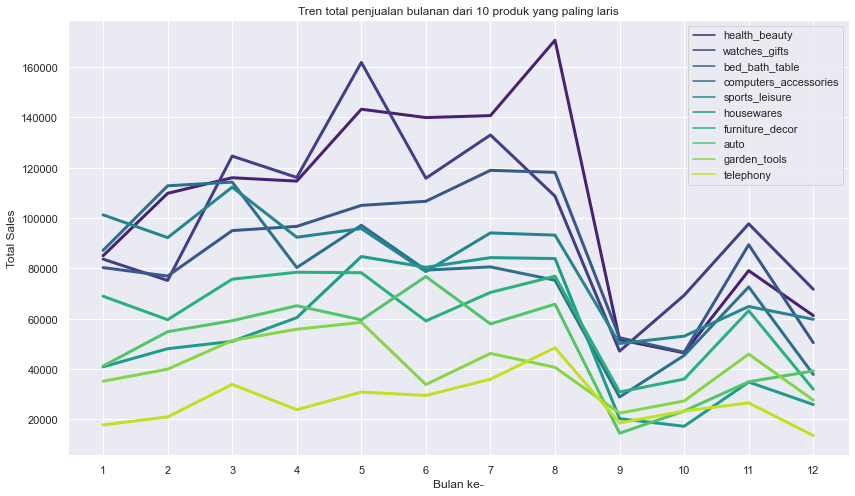

In [132]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=tren_penjualan, x ='month', y = 'price',
                  hue='product_name', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Tren total penjualan bulanan dari 10 produk yang paling laris")
plt.ylabel('Total Sales')
plt.xlabel('Bulan ke-')
plt.show()

Pola tren order produk dan tren total sales memiliki kemiripan, hal ini sangat wajar mengingat visualisasi sebelumnya menunjukkan bahwa produk yang paling banyak dijual cenderung menghasilkan total sales yang tinggi pula. Artinya, ketika terjadi lonjakan penurunan pada pemesanan produk maka akan diiringi pula oleh penurunan sales yang didapat. Dalam kasus ini, lonjakan penurunan sales terjadi dari bulan ke-8 sampai penghujung bulan dan sempat mengalami kenaikan sales pada bulan ke-11. Kemudian, perlahan-lahan sales mengalami penurunan lagi.

## Kesimpulan
Produk yang paling laris memiliki kecenderungan untuk menghasilkan total sales yang besar pula. Mulai dari bulan ke-8 terjadi penurunan order serta sales sampai bulan terakhir. Artinya, perusahaan perlu menyiapkan startegi untuk meningkatkan sales dan order yang harus diimplementasikan pada bulan ke-8 untuk tetap meningkatkan order dan sales produk, misalnya memberikan diskon awal bulan, melakukan promosi terutama untuk kategori produk yang paling laris, memberikan voucher gratis ongkir bagi customer yang paling sering melakukan order.
